In [1]:
#Import neccessary packages
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import the data
crypt = pd.read_excel("/Users/laurengarrett/Documents/Masters/Data Analytics in Practice/Case Study 4/Cryptoanalytics data master UPDATED.xlsx")

In [3]:
#Descriptive statistics for each column
crypt.describe()

,BTC price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI
count,3772.000000,3.771000e+03,3772.000000,3.764000e+03,3772.000000,3.772000e+03,3772.000000,3.772000e+03,2690.000000,1373.000000,2765.000000,649.000000,579.000000,2599.000000,2599.000000
mean,1403.258033,5.751124e+06,0.377734,2.035364e+05,108377.228261,7.827958e+11,50.806719,2.531434e+08,1304.657454,203.165177,25.669230,743.157596,0.163782,4244.222362,16168.615567
std,2819.373460,1.327368e+07,0.390596,2.145714e+05,111212.593607,1.821669e+12,105.561180,5.700107e+08,206.236944,263.090161,48.777683,626.362873,0.183359,1796.693060,5048.078306
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,810.000000,0.000000,0.000000,77.370000,0.018414,1268.640015,6547.049805
25%,0.000000,8.453424e+00,0.016707,1.035825e+04,5745.750000,1.192498e+06,4.382352,4.543548e+05,1195.750000,10.540000,1.840000,301.020000,0.044156,2716.220092,12114.120117
50%,236.925000,2.971424e+04,0.191825,1.341915e+05,63378.000000,3.815724e+09,18.291021,3.986244e+07,1273.750000,108.900000,3.850000,542.880000,0.087525,4151.229980,16179.080078
75%,761.060000,1.768041e+06,0.768401,4.007108e+05,210366.250000,2.412270e+11,42.840503,1.970181e+08,1367.437500,299.120000,30.460000,1028.120000,0.201908,5241.590088,18472.959961
max,19475.800000,6.186626e+07,1.304964,1.072861e+06,490644.000000,7.454970e+12,1495.946477,5.760245e+09,1895.000000,1397.480000,359.130000,3909.000000,1.170000,8161.850098,26828.390625


In [4]:
#Check for null values
sample_nas = crypt[crypt.isnull().any(axis=1)].head()
sample_nas

,date,BTC price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI,Google trends
0,2019-05-02,5402.42,5.400366e+07,1.126911,516500.0,439549,6.353030e+12,65.625219,8.710334e+08,NaN,160.85,73.68,271.97,0.069020,8036.770020,26307.789063,NaN
1,2019-05-01,5350.91,4.421352e+07,1.295071,551918.0,346486,6.353030e+12,85.484635,8.256662e+08,NaN,162.19,74.30,267.99,0.070338,8049.640137,26430.140625,NaN
2,2019-04-30,5247.73,5.147717e+07,1.203268,529709.0,363207,6.353030e+12,70.954700,8.838533e+08,NaN,155.17,67.95,237.57,0.064661,8095.390137,26592.910156,NaN
3,2019-04-29,5284.86,5.147717e+07,0.977574,406877.0,383291,6.353030e+12,47.953930,4.371152e+08,NaN,157.29,69.78,255.55,0.068620,8161.850098,26554.390625,NaN
4,2019-04-28,5271.75,4.326609e+07,1.170310,421593.0,359008,6.353030e+12,54.420927,4.530519e+08,NaN,158.50,72.12,264.12,0.070189,NaN,NaN,NaN


In [5]:
crypt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           3772 non-null   datetime64[ns]
 1   BTC price                      3772 non-null   float64       
 2   BTC network hashrate           3771 non-null   float64       
 3   Average BTC block size         3772 non-null   float64       
 4   NUAU - BTC                     3764 non-null   float64       
 5   Number TX - BTC                3772 non-null   int64         
 6   Difficulty - BTC               3772 non-null   float64       
 7   TX fees - BTC                  3772 non-null   float64       
 8   Estimated TX Volume USD - BTC  3772 non-null   float64       
 9   Gold in USD                    2690 non-null   float64       
 10  Ethereum Price                 1373 non-null   float64       
 11  Litecoin Price   

In [6]:
#Drop Google Trends and Gold in USD columns
crypt= crypt.drop(['Google trends','Gold in USD'],axis=1)

In [7]:
crypt.head()

,date,BTC price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI
0,2019-05-02,5402.42,5.400366e+07,1.126911,516500.0,439549,6.353030e+12,65.625219,8.710334e+08,160.85,73.68,271.97,0.069020,8036.770020,26307.789063
1,2019-05-01,5350.91,4.421352e+07,1.295071,551918.0,346486,6.353030e+12,85.484635,8.256662e+08,162.19,74.30,267.99,0.070338,8049.640137,26430.140625
2,2019-04-30,5247.73,5.147717e+07,1.203268,529709.0,363207,6.353030e+12,70.954700,8.838533e+08,155.17,67.95,237.57,0.064661,8095.390137,26592.910156
3,2019-04-29,5284.86,5.147717e+07,0.977574,406877.0,383291,6.353030e+12,47.953930,4.371152e+08,157.29,69.78,255.55,0.068620,8161.850098,26554.390625
4,2019-04-28,5271.75,4.326609e+07,1.170310,421593.0,359008,6.353030e+12,54.420927,4.530519e+08,158.50,72.12,264.12,0.070189,NaN,NaN


In [8]:
#drop rows with missing values
crypt = crypt.dropna()

In [9]:
#Check if there's any null
crypt.isnull().sum().sum() 

0

In [10]:
crypt.head()

,date,BTC price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI
0,2019-05-02,5402.42,5.400366e+07,1.126911,516500.0,439549,6.353030e+12,65.625219,8.710334e+08,160.85,73.68,271.97,0.069020,8036.770020,26307.789063
1,2019-05-01,5350.91,4.421352e+07,1.295071,551918.0,346486,6.353030e+12,85.484635,8.256662e+08,162.19,74.30,267.99,0.070338,8049.640137,26430.140625
2,2019-04-30,5247.73,5.147717e+07,1.203268,529709.0,363207,6.353030e+12,70.954700,8.838533e+08,155.17,67.95,237.57,0.064661,8095.390137,26592.910156
3,2019-04-29,5284.86,5.147717e+07,0.977574,406877.0,383291,6.353030e+12,47.953930,4.371152e+08,157.29,69.78,255.55,0.068620,8161.850098,26554.390625
6,2019-04-26,5210.30,4.516095e+07,1.219516,529636.0,384089,6.353030e+12,94.300876,8.217963e+08,154.58,71.36,267.19,0.069347,8146.399902,26543.330078


In [11]:
crypt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 577
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           392 non-null    datetime64[ns]
 1   BTC price                      392 non-null    float64       
 2   BTC network hashrate           392 non-null    float64       
 3   Average BTC block size         392 non-null    float64       
 4   NUAU - BTC                     392 non-null    float64       
 5   Number TX - BTC                392 non-null    int64         
 6   Difficulty - BTC               392 non-null    float64       
 7   TX fees - BTC                  392 non-null    float64       
 8   Estimated TX Volume USD - BTC  392 non-null    float64       
 9   Ethereum Price                 392 non-null    float64       
 10  Litecoin Price                 392 non-null    float64       
 11  Bitcoin Cash Price 

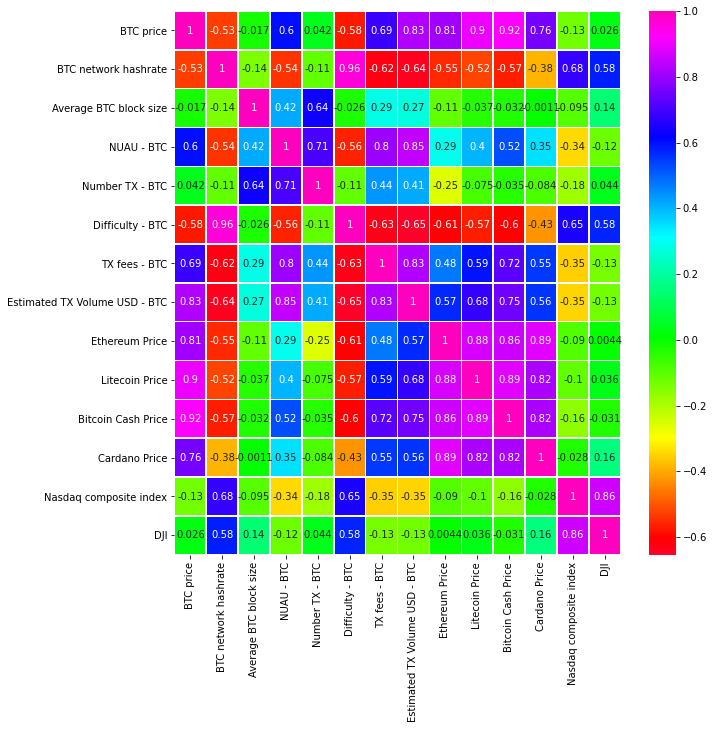

In [12]:
corr = crypt.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True, linewidth = 0.5,cmap="gist_rainbow")

In [15]:
#Define X and Y to seperate the dependent and independent variables to build the model
X = crypt.iloc[:,1:14] 
Y = crypt.iloc[:,1]

In [16]:
#Split into train and test data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [32]:
#Create the Random Forest Regression Model
#from sklearn.ensemble import RandomForestRegressor
#rnd_reg = RandomForestRegressor(n_estimators=14, max_depth=6, random_state=0)

In [44]:
#rnd_reg.fit(X_train, Y_train)

RandomForestRegressor(max_depth=6, n_estimators=14, random_state=0)

In [34]:
#Check fit
#preds = rnd_reg.predict(X_test)

In [33]:
#Make predictions
#preds

In [47]:
#from sklearn.metrics import mean_squared_error
#lin_mse = mean_squared_error(Y_test, preds)
#lin_rmse = np.sqrt(lin_mse)
#lin_rmse

119.10610450186088

In [35]:
#Check Fit
#preds1 = rnd_reg.predict(X_train)

In [36]:
#Make predictions
#preds1

In [50]:
#from sklearn.metrics import mean_squared_error
#lin_mse = mean_squared_error(Y_train, preds1)
#lin_rmse = np.sqrt(lin_mse)
#lin_rmse

59.980053580439446

In [51]:
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import r2_score, mean_squared_error
#import seaborn as sns

In [52]:
#from sklearn import metrics
#print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, preds))

Mean Absolute Error: 48.64179397964342


In [53]:
#print('Mean Squared Error:', metrics.mean_squared_error(Y_test, preds))

Mean Squared Error: 14186.264129608204


In [54]:
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, preds)))

Root Mean Squared Error: 119.10610450186088


In [55]:
#Possible to get an estimate of a feature’s importance
#rnd_reg.feature_importances_

array([9.97351655e-01, 8.00994523e-04, 4.17652963e-04, 4.39888879e-05,
       1.20104379e-04, 1.38371236e-04, 2.56899275e-04, 1.15922423e-04,
       1.01853509e-04, 3.87349990e-04, 5.35203283e-05, 1.39950628e-04,
       7.17367709e-05])

In [ ]:
###############################################################

In [24]:
from sklearn.metrics import r2_score, mean_squared_error
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import statistics as st

train_NRMSE= []
for depth in range(1,15):
    rnd_reg = RandomForestRegressor(max_depth=depth,random_state=0)
    rnd_reg.fit(X_train, Y_train)
    preds1=rnd_reg.predict(X_train)   
    train_NRMSE.append(np.sqrt(metrics.mean_squared_error(Y_train, preds1))/np.std(preds1))

In [25]:
# Build a table with NRMSE for train set
train_NRMSE_table= pd.DataFrame({'max_depth':range(1,15), 'train_NRMSE':train_NRMSE})

In [26]:
test_NRMSE= []
for depth in range(1,15):
    rnd_reg = RandomForestRegressor(max_depth=depth,random_state=0)
    rnd_reg.fit(X_train, Y_train)
    preds=rnd_reg.predict(X_test)  
    test_NRMSE.append(np.sqrt(metrics.mean_squared_error(Y_test, preds))/np.std(preds))

In [27]:
# Build a table with NRMSE for test set
test_NRMSE_table= pd.DataFrame({'max_depth':range(1,15), 'test_NRMSE':test_NRMSE})

In [28]:
merged_table = pd.merge(train_NRMSE_table,test_NRMSE_table,on='max_depth')

Text(0, 0.5, 'performance')

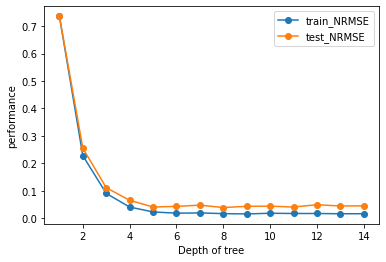

In [29]:
# Plot NRMSE
merged_table.plot('max_depth', y=['train_NRMSE','test_NRMSE'],kind='line',marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')

In [30]:
feature_importances = pd.DataFrame(rnd_reg.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
BTC price,0.985760
Estimated TX Volume USD - BTC,0.004950
TX fees - BTC,0.004048
Litecoin Price,0.002460
BTC network hashrate,0.001200
Cardano Price,0.000389
Number TX - BTC,0.000264
Average BTC block size,0.000242
Bitcoin Cash Price,0.000226
Nasdaq composite index,0.000177
